TUGAS 1
Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


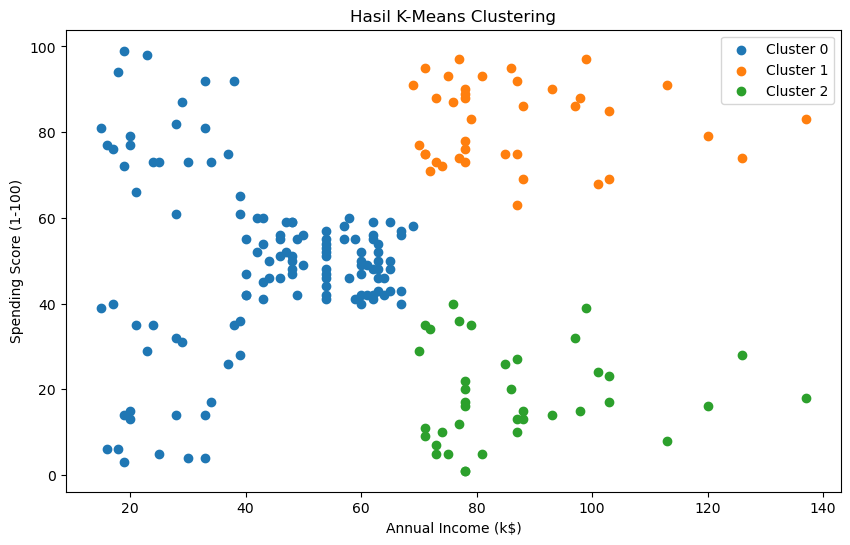

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memuat data dari 'Mall_Customers.csv'
data = pd.read_csv('../Mall_Customers.csv')

# Pilih fitur yang ingin digunakan untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# ...
# Menentukan jumlah kluster yang diinginkan
num_clusters = 3  # Mengganti nilai menjadi 3

# Membuat model K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Melatih model K-Means
kmeans.fit(X)

# Menambahkan label kluster ke data
data['Cluster'] = kmeans.labels_

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.show()


TUGAS 2
Buatlah model K-Means dengan mempertimbangkan jumlah  yang terbaik.

e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\App\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the env

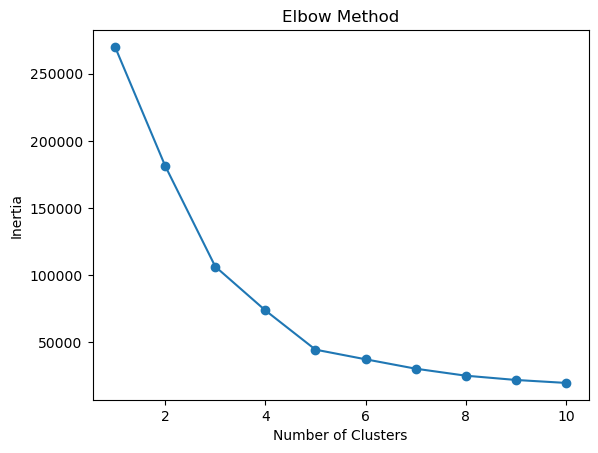

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Memuat dataset
data = pd.read_csv('../Mall_Customers.csv')

# Menghilangkan kolom yang tidak diperlukan
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Menyimpan inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
for k in range(1, 11):  # Coba jumlah kluster dari 1 hingga 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memplot inersia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


TUGAS 3
Buatlah  implementasi model SOM untuk segmentasi citra lain

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions for SOM
def initialize_som(dimensions, num_clusters):
    return np.random.rand(dimensions, num_clusters)

def find_best_matching_unit(data, som_weights):
    distances = np.linalg.norm(data - som_weights, axis=0)
    bmu_index = np.argmin(distances)
    return bmu_index

def update_som_weights(data, som_weights, learning_rate, bmu_index):
    delta = data - som_weights[:, bmu_index]
    som_weights[:, bmu_index] += learning_rate * delta
    return som_weights

def train_som(data, som_weights, learning_rate, num_epochs):
    for epoch in range(num_epochs):
        for sample in data:
            bmu_index = find_best_matching_unit(sample, som_weights)
            som_weights = update_som_weights(sample, som_weights, learning_rate, bmu_index)
    return som_weights

def segment_image(image, trained_weights):
    dimensions, num_clusters = trained_weights.shape[0], trained_weights.shape[1]
    reshaped_image = image.reshape(-1, dimensions)
    segmented_image = np.zeros_like(reshaped_image)

    for i, sample in enumerate(reshaped_image):
        bmu_index = find_best_matching_unit(sample, trained_weights)
        segmented_image[i] = trained_weights[:, bmu_index]

    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Load and normalize the image
image = plt.imread("../The_death.png")
image = image / 255.0  # Normalize pixel intensities to the range [0, 1]

# Initialize and train the SOM
num_clusters = 4  # You can adjust the number of clusters
dimensions = image.shape[-1]  # Use the number of color channels
learning_rate = 0.1
num_epochs = 100
som_weights = initialize_som(dimensions, num_clusters)
trained_weights = train_som(image.reshape(-1, dimensions), som_weights, learning_rate, num_epochs)

# Segment the image
segmented_image = segment_image(image, trained_weights)

# Display the results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(132)
plt.title('Trained SOM Weights')
plt.imshow(trained_weights.reshape(image.shape))
plt.axis('off')
plt.subplot(133)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()


KeyboardInterrupt: 